# Customer Churn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Importing all the necessary libraries

# Reading and Understanding the Data

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Loading the dataset. Here our target variable is "Churn".

In [3]:
df=pd.DataFrame(data=df)

Loading the Dataset in the DataFrame.

In [4]:
df.sample(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4494,0225-ZORZP,Male,0,No,No,3,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,84.30,235.05,No
6483,3644-QXEHN,Male,0,Yes,Yes,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,97.00,1334.45,No
4488,3714-JTVOV,Female,1,Yes,No,42,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.15,3229.4,Yes
6458,9644-UMGQA,Male,0,Yes,Yes,6,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,49.15,295.65,No
6700,8107-RZLNV,Male,0,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),106.30,7565.35,No
4201,1166-PQLGG,Female,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.55,1463.45,No
6659,3967-KXAPS,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),92.30,6719.9,No
6123,0623-EJQEG,Male,0,No,No,65,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Yes,One year,No,Electronic check,93.55,6069.25,No
2068,9079-LWTFD,Male,0,No,No,47,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,No,Mailed check,100.75,4669.2,No
3320,2195-VVRJF,Male,1,Yes,No,18,Yes,No,DSL,Yes,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),59.10,1011.05,No


Taking out 15 samples from the dataset for our further understanding of the data.

# Data Inspection

In [5]:
df.shape

(7043, 21)

There are 7043 rows and 21 columns in the dataset.

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

It gives us the names of all the columns.
Here "Churn" is our target variable.

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Only SeniorCitizen and tenure are of Integer data type, MonthlyCharges are of Float data type. Rest all columns are of object data type.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here we get the data type count, non-null value count of each column and memory usage od the DataFrame.

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


It gives us the mean, standard deviation, median, minimum and maximum value of each numerical column.

# Data Cleaning

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the dataset.

<AxesSubplot:>

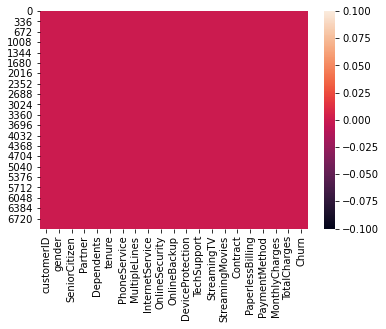

In [11]:
sns.heatmap(df.isnull())

Visual representataion of having absolutely no null values in the dataset.

In [12]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

There is skewness in only 'SeniorCitizen'.

In [13]:
df['SeniorCitizen']=np.sqrt(df['SeniorCitizen'])
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

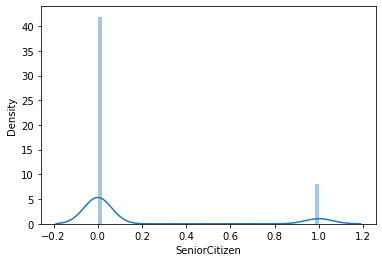

In [14]:
sns.distplot(df['SeniorCitizen'])

'SeniorCitizen' has linear distribution of data.

<AxesSubplot:xlabel='tenure', ylabel='Density'>

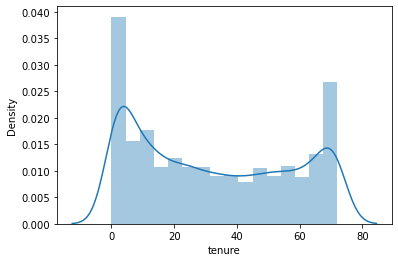

In [15]:
sns.distplot(df['tenure'])

The data in tenure is not normalized.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

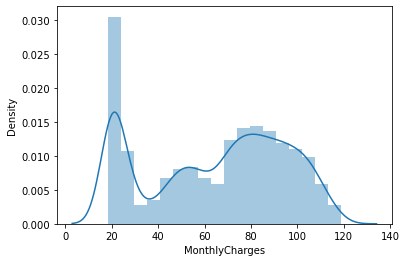

In [16]:
sns.distplot(df['MonthlyCharges'])

The data is not normalized in 'MonthlyCharges'.

In [17]:
dfa=df['tenure'],df['MonthlyCharges'],df['SeniorCitizen']
dfzscore=np.abs(zscore(dfa))
print(np.where(dfzscore>3))

(array([], dtype=int64), array([], dtype=int64))


There are no considerable outliers in the dataset. Hence no need to treat them.

<AxesSubplot:xlabel='SeniorCitizen'>

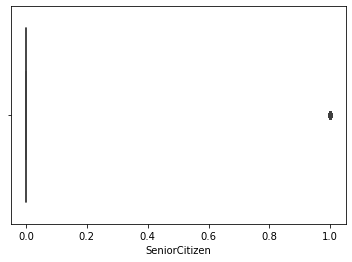

In [18]:
sns.boxplot(df['SeniorCitizen'])

There are no outliers in 'SeniorCitizen'.

<AxesSubplot:xlabel='tenure'>

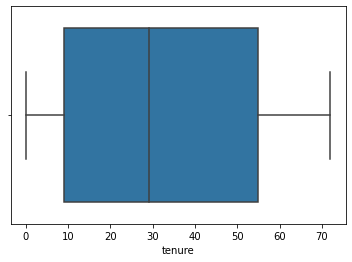

In [19]:
sns.boxplot(df['tenure'])

There are no outliers in tenure.

<AxesSubplot:xlabel='MonthlyCharges'>

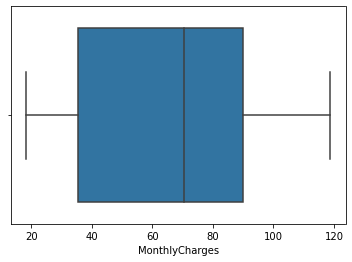

In [20]:
sns.boxplot(df['MonthlyCharges'])

There are no outliers in 'MonthlyCharges'

# Exploratory Data Analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

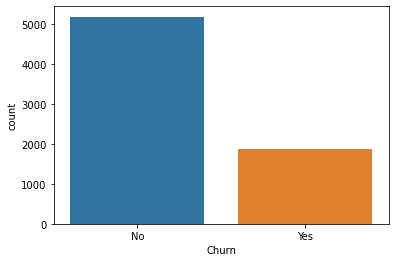

In [21]:
sns.countplot(df['Churn'])

There exist a lot of class imbalance which we will have to treat.

<AxesSubplot:xlabel='customerID', ylabel='Count'>

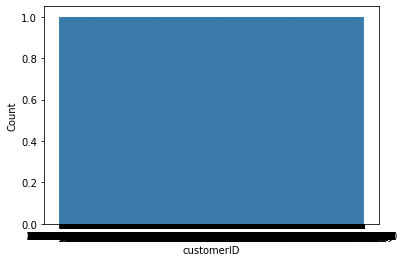

In [22]:
sns.histplot(df['customerID'])

'customerID' has a unique value in it. 

<AxesSubplot:xlabel='gender', ylabel='Count'>

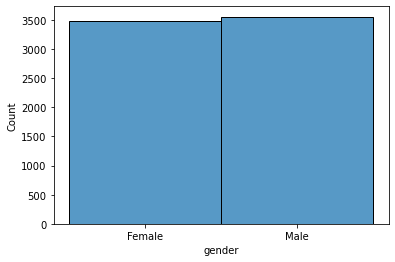

In [23]:
sns.histplot(df['gender'])

'gender' has almost equal count in being a customer 

<AxesSubplot:xlabel='Partner', ylabel='Count'>

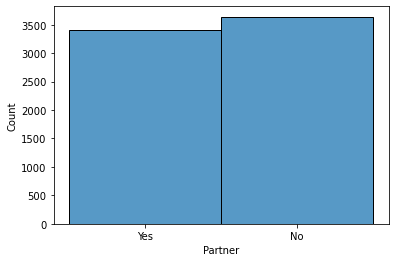

In [24]:
sns.histplot(df['Partner'])

Customers having 'Partner' or not doesn't make any much difference in their shopping rate but still customers with no partners shop very often.

<AxesSubplot:xlabel='Dependents', ylabel='Count'>

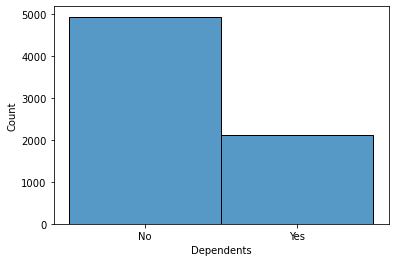

In [25]:
sns.histplot(df['Dependents'])

Almost all the customers are not 'Dependents' on anyone. 

<AxesSubplot:xlabel='PhoneService', ylabel='Count'>

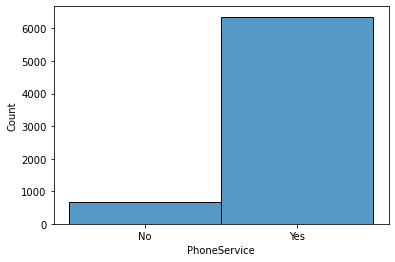

In [26]:
sns.histplot(df['PhoneService'])

Majority of the customers prefer 'PhoneService'

<AxesSubplot:xlabel='MultipleLines', ylabel='Count'>

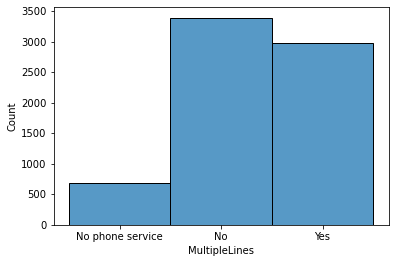

In [27]:
sns.histplot(df['MultipleLines'])

Majority of customers don't prefer 'MultipleLines'

<AxesSubplot:xlabel='InternetService', ylabel='Count'>

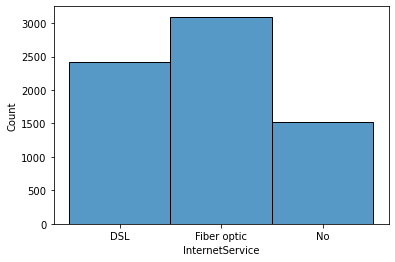

In [28]:
sns.histplot(df['InternetService'])

Majority of customers have 'Fibre optic InternetService'

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Count'>

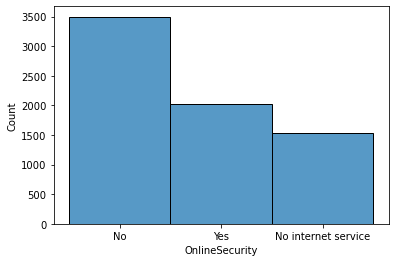

In [29]:
sns.histplot(df['OnlineSecurity'])

Majority of customers does not have 'OnlineSecurity'

<AxesSubplot:xlabel='OnlineBackup', ylabel='Count'>

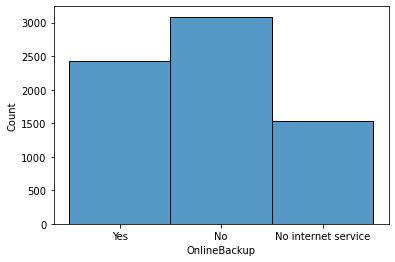

In [30]:
sns.histplot(df['OnlineBackup'])

Majority of customers does not have 'OnlineBackup'

<AxesSubplot:xlabel='DeviceProtection', ylabel='Count'>

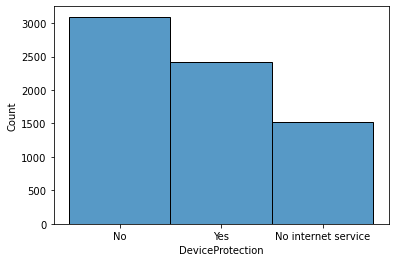

In [31]:
sns.histplot(df['DeviceProtection'])

Majority of customers does not have  DeviceProtection

<AxesSubplot:xlabel='TechSupport', ylabel='Count'>

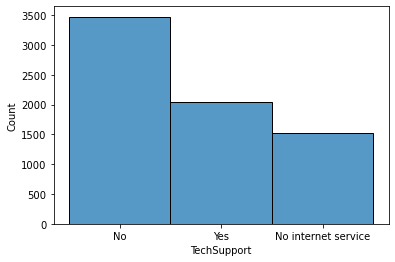

In [32]:
sns.histplot(df['TechSupport'])

Majority of customers does not have 'TechSupport'

<AxesSubplot:xlabel='StreamingTV', ylabel='Count'>

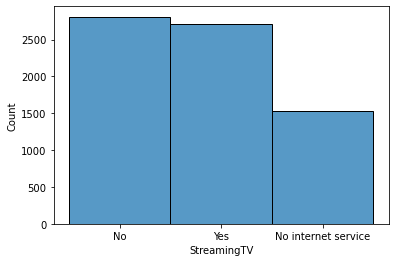

In [33]:
sns.histplot(df['StreamingTV'])

Majority of customers does not purchase from 'StreamingTV'

<AxesSubplot:xlabel='StreamingMovies', ylabel='Count'>

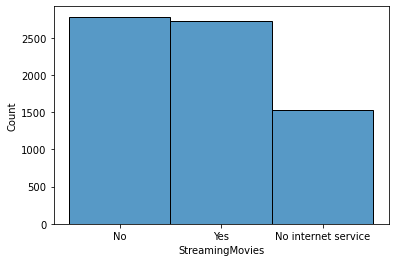

In [34]:
sns.histplot(df['StreamingMovies'])

Almost equal number of customers believes in 'StreamingMovies' and not , followed by few customers who do not have internet services.  

<AxesSubplot:xlabel='Contract', ylabel='Count'>

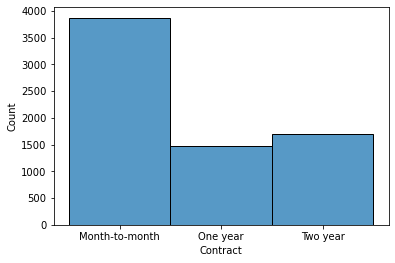

In [35]:
sns.histplot(df['Contract'])

Majority of customers have Month-to-month 'Contract' , followed by two-year and one-year.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Count'>

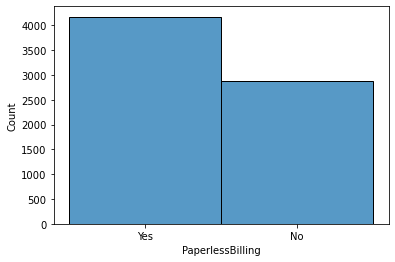

In [36]:
sns.histplot(df['PaperlessBilling'])

Majority of customers do not believe in 'PaperlessBilling'

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

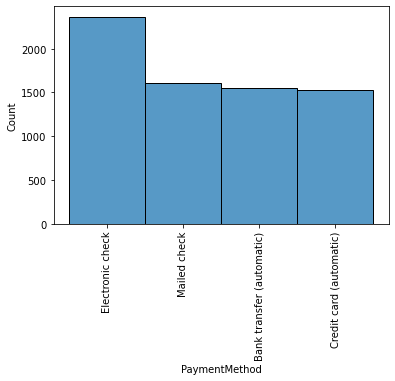

In [37]:
sns.histplot(df['PaymentMethod'])
plt.xticks(rotation=90)

Majority of customers follow Electronic Check for payment.

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

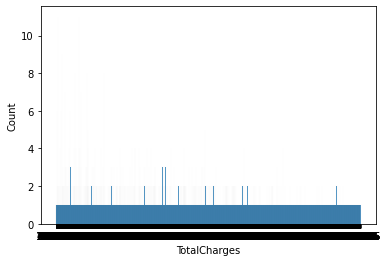

In [38]:
sns.histplot(df['TotalCharges'])

'TotalCharges' have a wide range of charges in it. 

# Bivariate Analysis

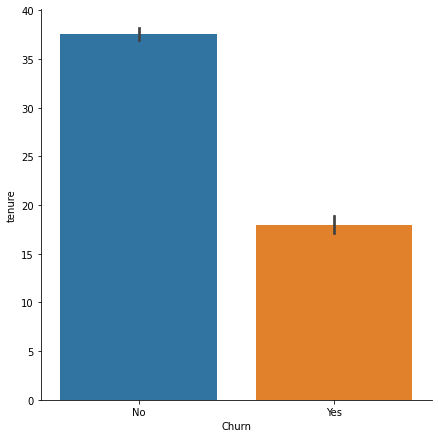

In [39]:
sns.catplot(y = "tenure", x = "Churn", data = df, kind="bar", height = 6)

Maximum customers with Churn have less tenure

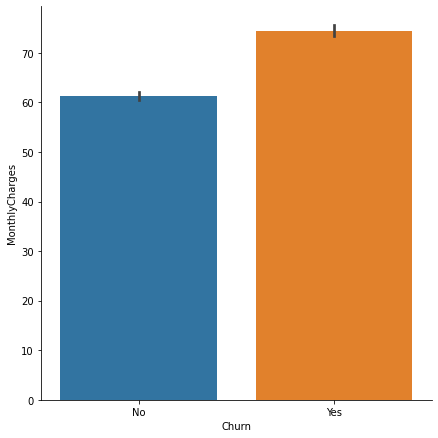

In [40]:
sns.catplot(y = "MonthlyCharges", x = "Churn", data = df, kind="bar", height = 6)

Maximum customers with Churn have high Monthly Charges.

In [41]:
le = LabelEncoder() 
list=['customerID','SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
for l in list:
    df[l]=le.fit_transform(df[l])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


<AxesSubplot:xlabel='customerID', ylabel='Churn'>

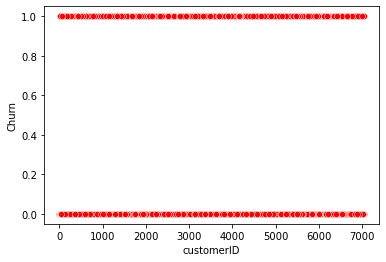

In [42]:
sns.scatterplot(x=df['customerID'],y=df['Churn'],color='red')

We can see that "CustomerID" doesn't affect churn.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

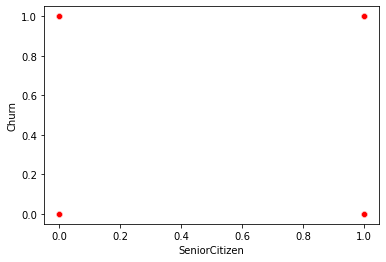

In [43]:
sns.scatterplot(x=df['SeniorCitizen'],y=df['Churn'],color='red')

'SeniorCitizen' does not affect the churn.

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

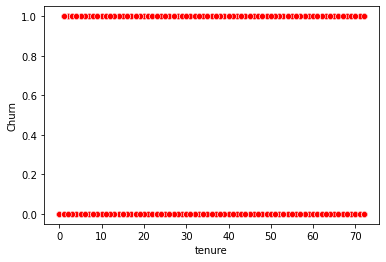

In [44]:
sns.scatterplot(x=df['tenure'],y=df['Churn'],color='red')

Tenure doesnot affect the Churn.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

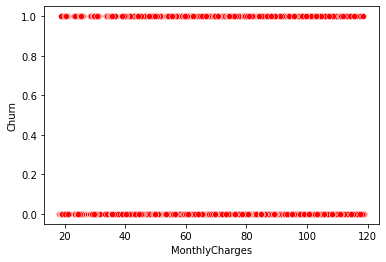

In [45]:
sns.scatterplot(x=df['MonthlyCharges'],y=df['Churn'],color='red')

High the Monthly Charges are , more chances of Churn.

<AxesSubplot:xlabel='Partner', ylabel='Churn'>

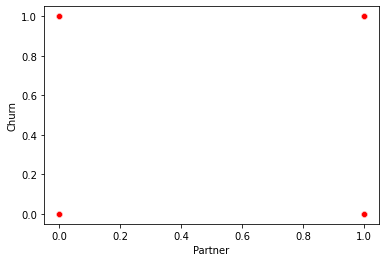

In [46]:
sns.scatterplot(x=df['Partner'],y=df['Churn'],color='red')

Since Partner is a categorical column, Scatterplot won't work on it.

<AxesSubplot:xlabel='PhoneService', ylabel='Churn'>

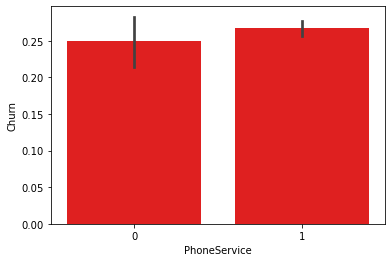

In [47]:
sns.barplot(x=df['PhoneService'],y=df['Churn'],color='red')

"PhoneService" does not affect the Churn very much.

<AxesSubplot:xlabel='PaymentMethod', ylabel='Churn'>

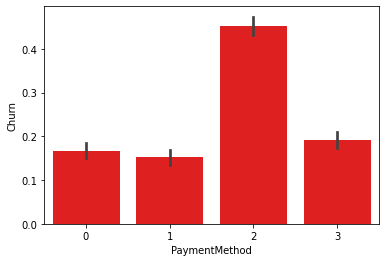

In [49]:
sns.barplot(x=df['PaymentMethod'],y=df['Churn'],color='red')

Electric bills (2) have maximum churn rate.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

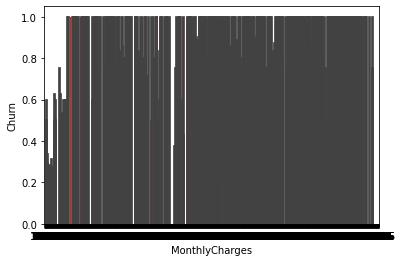

In [50]:
sns.barplot(x=df['MonthlyCharges'],y=df['Churn'],color='red')

'MonthlyCharges' have a wide range of values in it. It does not seem to affect the target variable much. It must be having very less correlation with the target variable, though the positive correlation.

<AxesSubplot:xlabel='TechSupport', ylabel='Churn'>

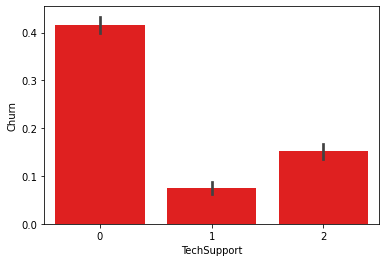

In [51]:
sns.barplot(x=df['TechSupport'],y=df['Churn'],color='red')

"Tech Support" is directly related to Churn. As we can see that No churn is for having no Tech support.

<AxesSubplot:xlabel='Partner', ylabel='Churn'>

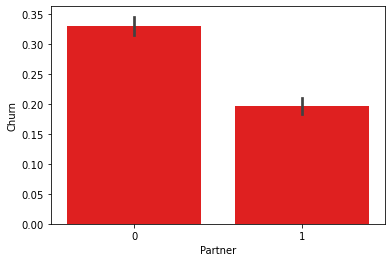

In [53]:
sns.barplot(x=df['Partner'],y=df['Churn'],color='red')

Partner is inversely proportional to Churn.

<AxesSubplot:xlabel='MultipleLines', ylabel='Churn'>

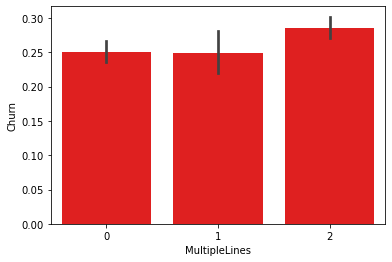

In [55]:
sns.barplot(x=df['MultipleLines'],y=df['Churn'],color='red')

Multiplelines is directly proportional to churn.

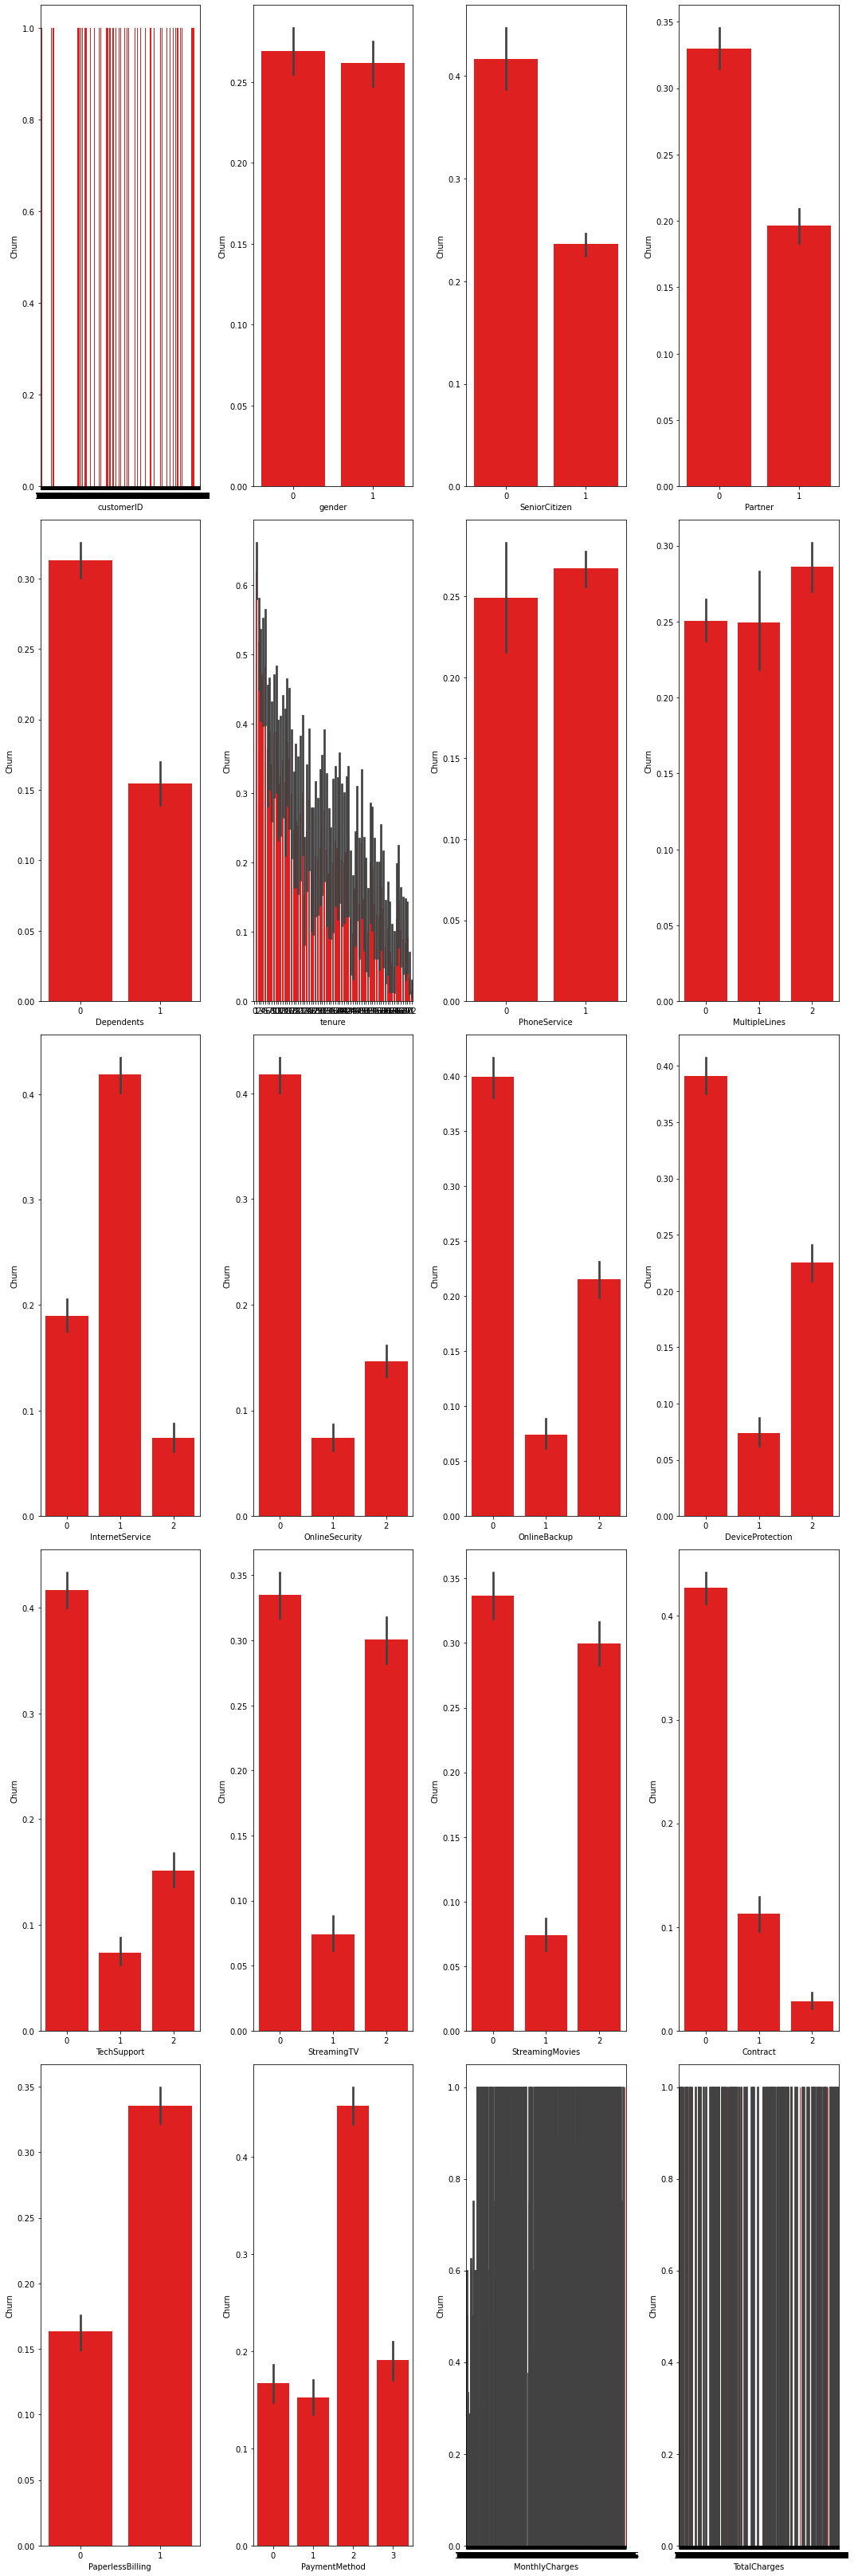

In [56]:
collist1=df.drop(['Churn'],axis=1).columns.values
ncol=15
nrows=5
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist1)):
    plt.subplot(5,4,i+1)
    sns.barplot(x=df[collist1[i]],y=df['Churn'],color='red',orient='v')
    plt.tight_layout()

Looks like each column have either direct or inverse relation with the target variable, except 'Gender', 'Tenure', 'Monthly Charges' and 'Total Charges'.

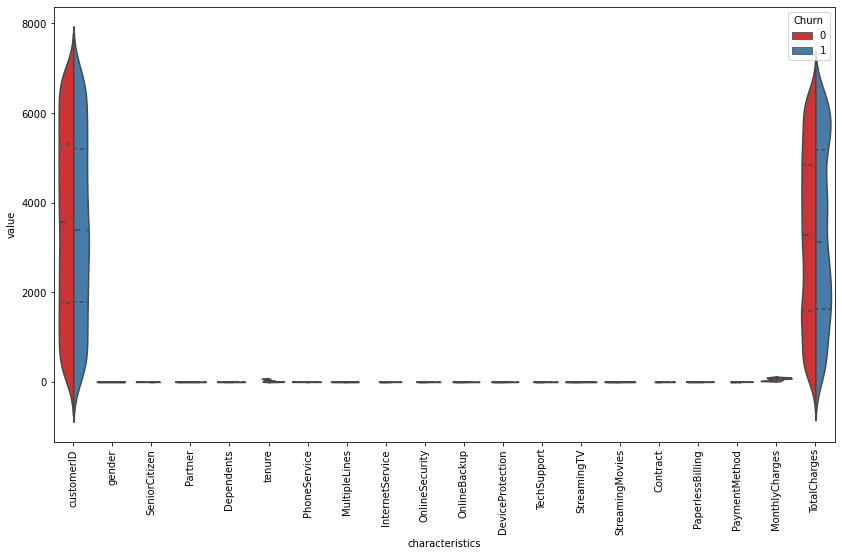

In [57]:
df_div = pd.melt(df, "Churn", var_name="characteristics")
plt.figure(figsize=(14,8))
v=sns.violinplot(x="characteristics",y="value",hue="Churn",split=True,data=df_div,inner='quartile',palette='Set1')
df_no_class = df.drop(["Churn"],axis=1)
v.set_xticklabels(rotation=90,labels=df_no_class.columns);

It represents the distribution of classification characteristics. 

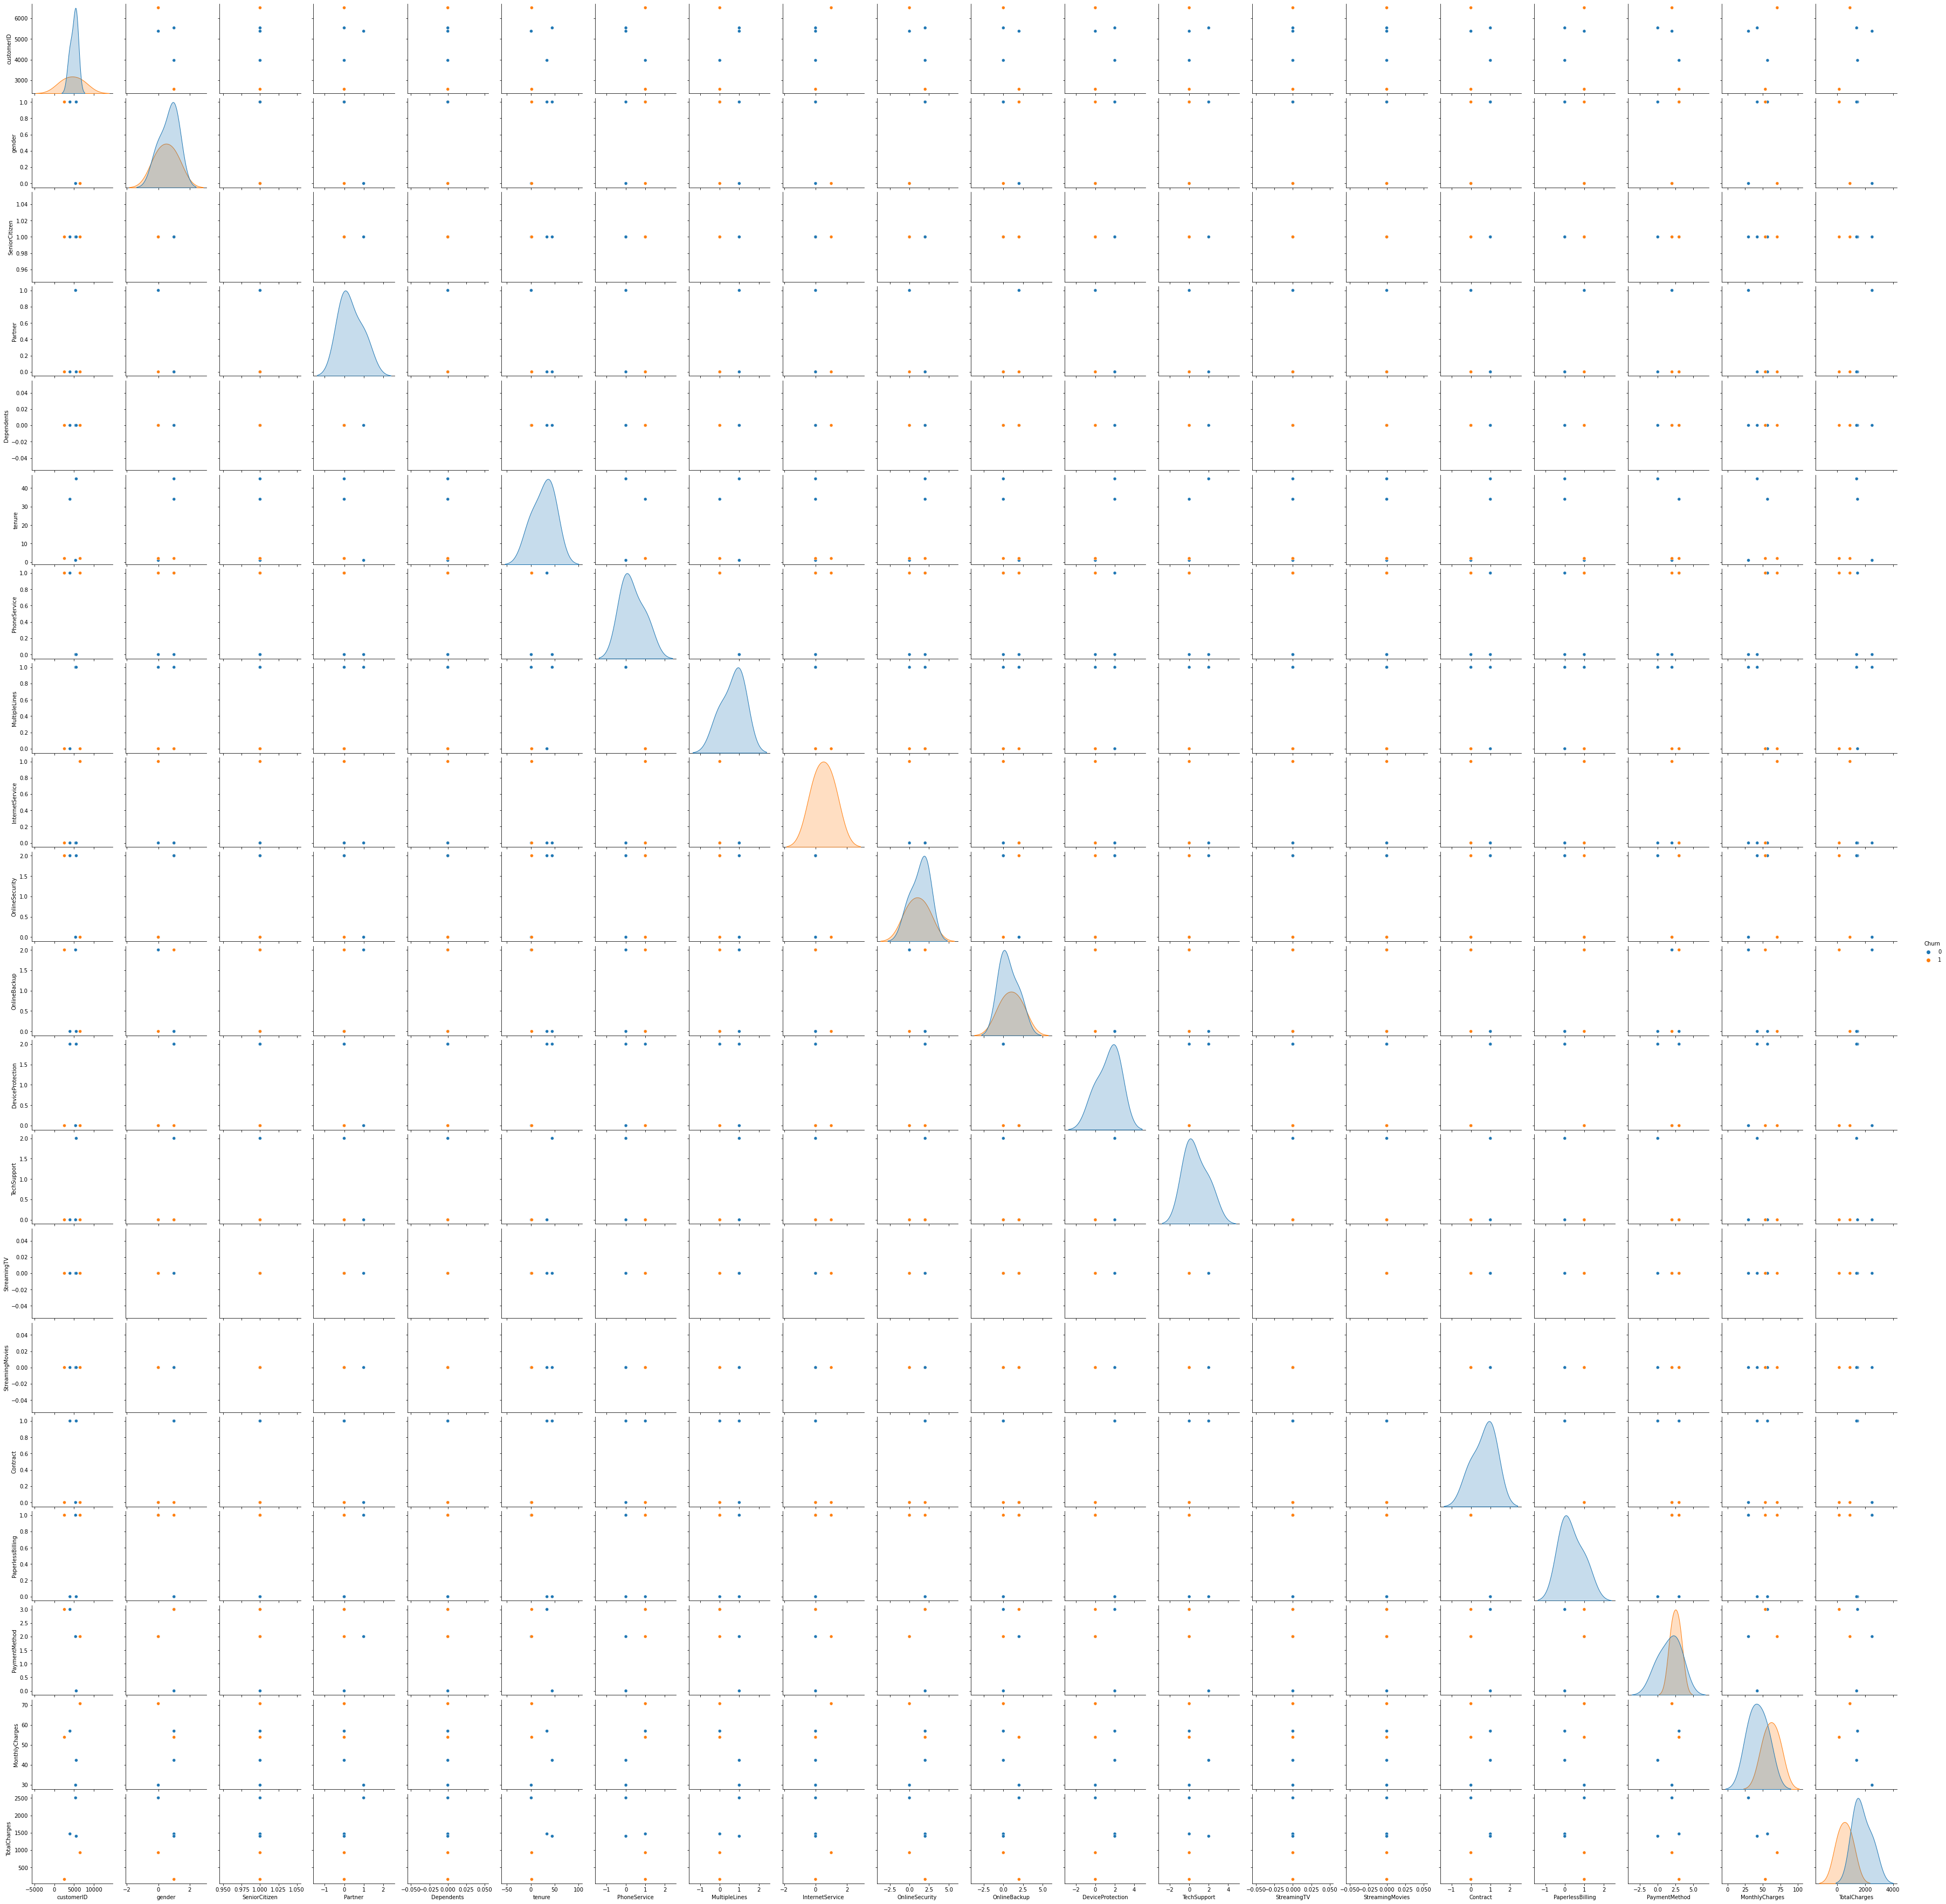

In [58]:
sns.pairplot(df,hue="Churn")

We can see that all the distributions are normalized. And the skewness has been treated properly.

# Multivariate Analysis

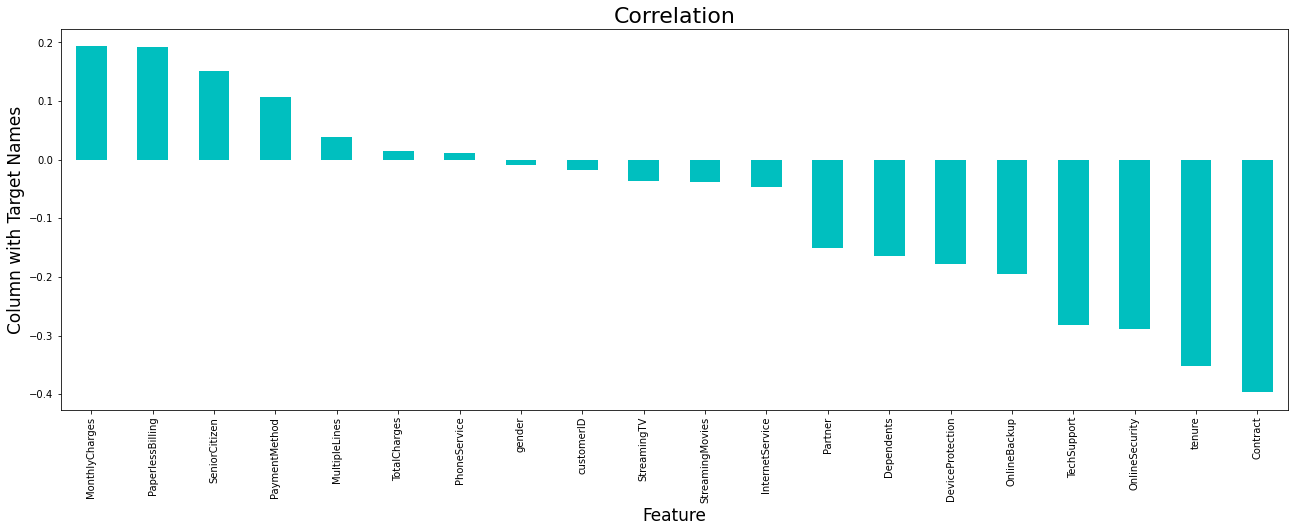

In [59]:
dfc = df.corr()
plt.figure(figsize=(22,7))
dfc['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.ylabel('Column with Target Names',fontsize=17)
plt.xlabel('Feature',fontsize=17)
plt.title('Correlation',fontsize=22)
plt.show()

'Monthly Charges', 'PaperlessBilling', 'Payment Methods', 'MultipleLines', and 'Total Charges' have direct relation with the target variable whereas rest all columns are inversely proportional to the target column or have a negative correlation.

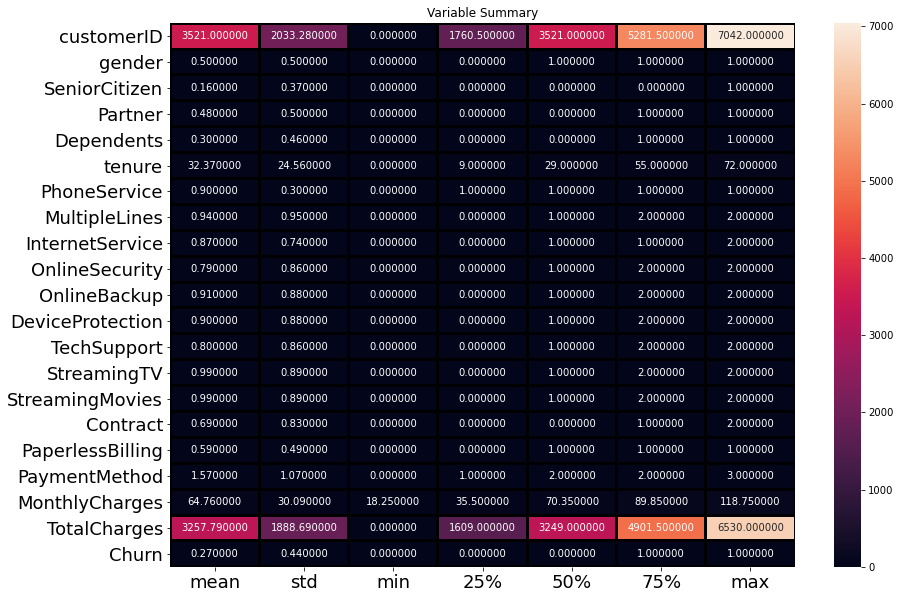

In [60]:
plt.figure(figsize=(14,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),lw=2,linecolor='black',annot=True,fmt='f',color='red')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Variable Summary')
plt.show()

From the above plot we are determining mean, standard deviation, median, minimum and maximum of each column. 

<AxesSubplot:>

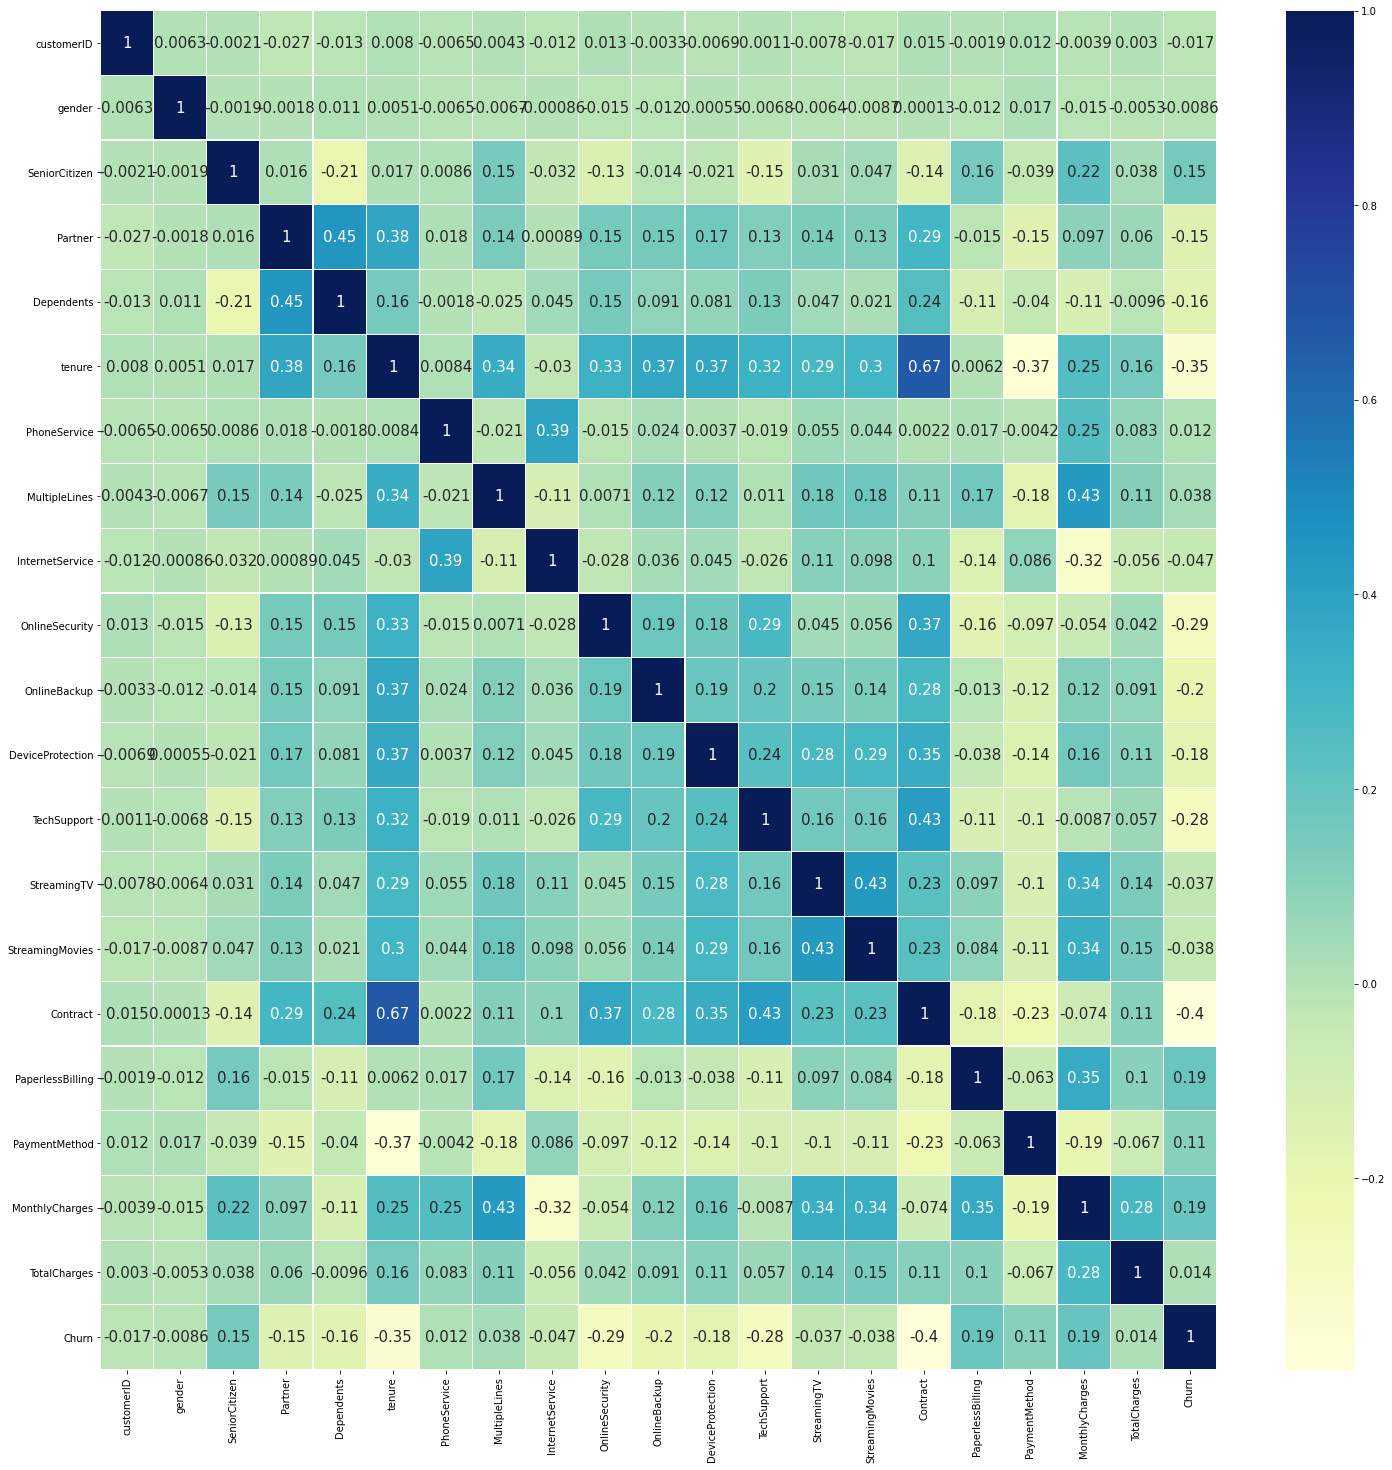

In [61]:
plt.figure(figsize=(25,25))
sns.heatmap(dfc, linewidth=0.1, cmap="YlGnBu", annot = True, annot_kws={"size":15})

There does not exist any multicollinearity in the dataset.

# Model Building

In [62]:
x= df.iloc[:,:-1]
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,1525,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,3367,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,5934,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


We have stored our Feature variables in x

In [63]:
y = df.iloc[:,-1]

'y' contains our target variable.

In [64]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

Normalizing the feature variables.

In [65]:
scale = StandardScaler()
x=scale.fit_transform(x)

Scaling the feature variables.

<AxesSubplot:xlabel='Churn', ylabel='count'>

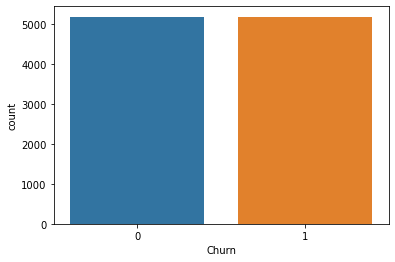

In [66]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y = smt.fit_resample(x,y)
sns.countplot(y)

Treating calss imbalance by over_sampling. Now there is no class imbalance.

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_train_lr=lr.predict(x_train)
predlr=lr.predict(x_test)

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
predkn=kn.predict(x_test)

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)

sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)

Building models for the target predition.

# Accuracy

In [68]:
print('Accuracy of Logistic Regression is',(accuracy_score(y_test,predlr))*100,'%')
print('Accuracy of RandomForest Classifier is',(accuracy_score(y_test,predrf))*100,'%')
print('Accuracy of KNeighbors Classifier is',(accuracy_score(y_test,predkn))*100,'%')
print('Accuracy of DecisionTree Classifier is',(accuracy_score(y_test,preddt))*100,'%')
print('Accuracy of SVC is',(accuracy_score(y_test,predsv))*100,'%')

Accuracy of Logistic Regression is 79.3719806763285 %
Accuracy of RandomForest Classifier is 86.08695652173914 %
Accuracy of KNeighbors Classifier is 79.95169082125604 %
Accuracy of DecisionTree Classifier is 79.42028985507247 %
Accuracy of SVC is 82.22222222222221 %


We have printed the accuracy of each model we have used.

# Cross Validation Score

In [70]:
print("CVS for Logistic Regression =",cvs(lr,x,y,cv=5).mean()*100,"%")
print("CVS for Random Forest Classifier =",cvs(rf,x,y,cv=5).mean()*100,"%")
print("CVS for K-Neighbor Classifier =",cvs(kn,x,y,cv=5).mean()*100,"%")
print("CVS for DecisionTree Classifier =",cvs(dt,x,y,cv=5).mean()*100,"%")
print("CVS for Support Vector Machine Classifier =",cvs(sv,x,y,cv=5).mean()*100,"%")

CVS for Logistic Regression = 78.11196335133546 %
CVS for Random Forest Classifier = 86.88227877361463 %
CVS for K-Neighbor Classifier = 79.66776640679176 %
CVS for DecisionTree Classifier = 78.77934916865718 %
CVS for Support Vector Machine Classifier = 81.47523950285208 %


The minimum difference between accuracy and CVS is for Random Forest Classifier , hence we will Hypertune this model.

# Hyper Parameter Tuning

In [71]:
parameter={'n_estimators':np.arange(50,350,50),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2'],
          'class_weight':['balanced', 'balanced_subsample']}
gvc = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gvc.fit(x_train,y_train)
gvc.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 150}

We get the best parameters to be used in RandomForestClassifier() to increase it's accuracy.

In [72]:
ChurnPrediction = RandomForestClassifier(criterion='entropy',n_estimators=150,max_features='sqrt',class_weight='balanced')
ChurnPrediction.fit(x_train,y_train)
pred=ChurnPrediction.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classifier for Churn Prediction Model is ", acc*100, "%")

Accuracy of Random Forest Classifier for Churn Prediction Model is 88.66776640679176 %


The accuracy we got for final model is good.

# AUC-ROC CURVE

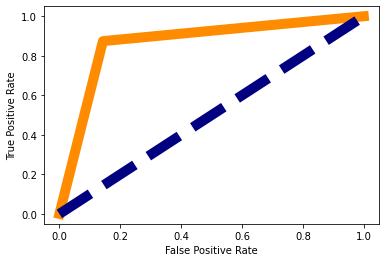

In [73]:
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,pred)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE")
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Since the model without outliers and Class Imbalance is working welll. Hence we will choose that only.

# Conclusion

In [74]:
a= np.array(y_test)
predicted = np.array(ChurnPrediction.predict(x_test))
C_Prediction=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
C_Prediction

,Original,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
2065,0,0
2066,0,0
2067,1,1
2068,0,1


We can see that almost all the predicted values are equal to the Original values and hence we conclude that our model is working very well.

# Model Saving

In [75]:
import pickle
filename = 'Churn.pkl'
pickle.dump(ChurnPrediction,open(filename,'wb'))

We have saved our final model .